<a href="https://colab.research.google.com/github/yuvrajrajput/machine-learning-with-me/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

## 2. Import Data

Let us look at the price of oranges since 1980. For now let us focus on the prices in December. The price bounces around a lot but mostly increases. 

CPI Average Price Data, U.S. city average (AP)  
Bureau of Labor Statistics					
					
Series Id:	APU0000711311  
Series Title:	Oranges, Navel, per lb. (453.6 gm) in U.S. city average, average price, not seasonally adjusted				  
Area:	U.S. city average		  		
Item:	Oranges, Navel, per lb. (453.6 gm)				  
Years:	1980 to 2020				  


In [ ]:
data = {
'Year':[1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018],
'Price':[0.45 ,0.39 ,0.46 ,0.37 ,0.52 ,0.50 ,0.50 ,0.52 ,0.56 ,0.53 ,0.56 ,0.65 ,0.52 ,0.56 ,0.55 ,0.64 ,0.59 ,0.58 ,0.61 ,0.64 ,0.62 ,0.71 ,0.74 ,0.86 ,0.87 ,0.89 ,0.96 ,0.91 ,0.93 ,0.93 ,1.02 ,0.98 ,1.04 ,1.13 ,1.25 ,1.23 ,1.17 ,1.32 ,1.39],
"Rainfall":[50.17, 44.87, 62.58, 66.26, 50.21, 53.73, 54.39, 54.74, 54.27, 50.39, 43.53, 64.47, 58.09, 51.17, 66.8, 61.46, 55.73, 62.63, 58.14, 51.12, 43.16, 54.56, 59.49, 61.11,59.22,62.75,42.63,45.21,55.12,56.05,49.19,48.99,55.51,59.8,59.13,52.86,52.99,58.52,60.52]}


## 3. Store data in pandas dataframe

In [ ]:
data = pd.DataFrame(data, columns = ['Year', 'Price','Rainfall'])
data.head()

,Year,Price,Rainfall
0,1980,0.45,50.17
1,1981,0.39,44.87
2,1982,0.46,62.58
3,1983,0.37,66.26
4,1984,0.52,50.21


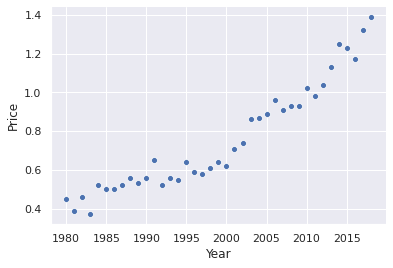

In [ ]:
sns.set()
sns.scatterplot(data["Year"],data["Price"], palette = 'muted')
sns.despine()


## 4. Visualize Errors

[Text(0.5, 0, 'Year')]

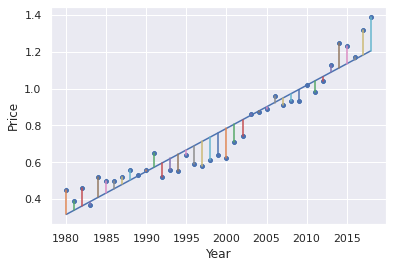

In [ ]:
model = LinearRegression()
model.fit(data["Year"].values.reshape(-1, 1),data["Price"].values.reshape(-1, 1))

ax = sns.scatterplot(data["Year"],data["Price"])
sns.lineplot(data["Year"],model.predict(data["Year"].values.reshape(-1, 1))[:,0])
for i in range(len(data)):
    plt.plot(
        [data["Year"][i],data["Year"][i]],
        [data["Price"][i],model.predict(data["Year"][i].reshape(1, -1))]
        )
ax.set(xlabel="Year")

## 5. Construct Oridnary Least Squares Line

[Text(0.5, 0, 'Year')]

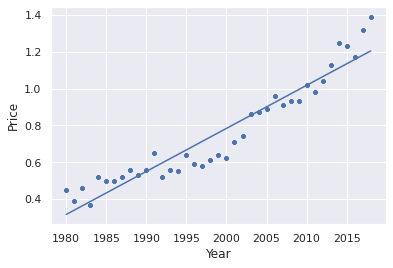

In [ ]:
sns.scatterplot(data["Year"],data["Price"])

ax = sns.lineplot(data["Year"],model.predict(data["Year"].values.reshape(-1, 1))[:,0])

ax.set(xlabel="Year")

## 6. Predict Price using Multiple Variables

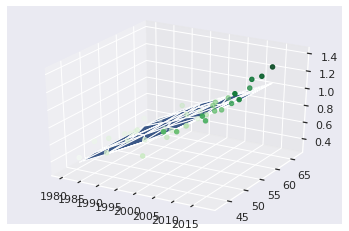

In [ ]:
model = LinearRegression()
model.fit(data[["Year","Rainfall"]].values,data["Price"].values.reshape(-1, 1))
ax = plt.axes(projection='3d')
ax.scatter3D(data['Year'], data['Rainfall'], data['Price'], c=data['Price'], cmap='Greens')
x = data['Year'].values
y = data['Rainfall'].values
z = model.predict(data[["Year","Rainfall"]].values)[:,0]
ax.plot_trisurf(x,y,z)
plt.show()